<a href="https://colab.research.google.com/github/amiralitalebi/CN6005_2321004/blob/main/Week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# I am mounting Drive so I can read my CSVs from Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# I am building a tiny perceptron using NumPy

import numpy as np

# dot product of inputs and weights
def sumofXW(inputs, weights):
    return inputs.dot(weights)

# simple step function with threshold at 1
def step_function(sum_func):
    return 1 if sum_func >= 1 else 0

In [5]:
# testing with small numbers to see the behaviour

weights = np.array([0.7, 0.1])
inputs = np.array([55, 75])

s_prob1 = sumofXW(inputs, weights)
print("sum:", s_prob1)
print("output:", step_function(s_prob1))

# try negative-ish weights to flip the behaviour
weights = np.array([-0.7, -0.1])
s_prob2 = sumofXW(inputs, weights)
print("sum:", s_prob2)
print("output:", step_function(s_prob2))


sum: 46.0
output: 1
sum: -46.0
output: 0


In [6]:
# I am building a dataset for an AND gate
# X1 X2 -> Y
# 0  0  -> 0
# 0  1  -> 0
# 1  0  -> 0
# 1  1  -> 1

inputs = np.array([[0,0], [0,1], [1,0], [1,1]])
outputs = np.array([0, 0, 0, 1])

print("inputs shape:", inputs.shape)
print("outputs shape:", outputs.shape)

# start with zero weights
weights = np.array([0.0, 0.0])
print("initial weights:", weights)


inputs shape: (4, 2)
outputs shape: (4,)
initial weights: [0. 0.]


In [7]:
# perceptron learning rule:
# new_weights = old_weights + LR * error * input

LR = 0.1

def train_perceptron_AND(inputs, outputs, weights, LR=0.1):
    total_error_value = 1
    epoch = 0
    while total_error_value != 0:
        total_error_value = 0
        epoch += 1
        for i in range(len(outputs)):
            XW = sumofXW(inputs[i], weights)
            pred = step_function(XW)
            error = abs(outputs[i] - pred)
            total_error_value += error
            if error > 0:
                for j in range(len(weights)):
                    weights[j] = weights[j] + (LR * inputs[i][j] * error)
        print(f"epoch {epoch:2d} | total_error: {total_error_value} | weights: {weights}")
    return weights

weights = np.array([0.0, 0.0])
weights = train_perceptron_AND(inputs, outputs, weights, LR=0.1)
print("final weights:", weights)


epoch  1 | total_error: 1 | weights: [0.1 0.1]
epoch  2 | total_error: 1 | weights: [0.2 0.2]
epoch  3 | total_error: 1 | weights: [0.3 0.3]
epoch  4 | total_error: 1 | weights: [0.4 0.4]
epoch  5 | total_error: 1 | weights: [0.5 0.5]
epoch  6 | total_error: 0 | weights: [0.5 0.5]
final weights: [0.5 0.5]


In [8]:
# I want to verify the learned AND gate
print("weights:", weights)
for i in range(len(inputs)):
    XW = sumofXW(inputs[i], weights)
    op = step_function(XW)
    print("sample:", inputs[i], "->", op)


weights: [0.5 0.5]
sample: [0 0] -> 0
sample: [0 1] -> 0
sample: [1 0] -> 0
sample: [1 1] -> 1


ANN vs Logistic Regression

In [13]:
# I am loading the diabetes dataset from my Drive and making a train/test split

import pandas as pd
from sklearn.model_selection import train_test_split

data_path = "/content/drive/MyDrive/UEL_Ai/Diabetes_ANN.csv"

df = pd.read_csv(data_path)
print("shape:", df.shape)
print(df['Outcome'].value_counts())

X = df.drop(columns=['Outcome'])
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)
print("train:", X_train.shape, " test:", X_test.shape)


shape: (5000, 9)
Outcome
1    3320
0    1680
Name: count, dtype: int64
train: (4000, 8)  test: (1000, 8)


Logistic Regression | Acc: 0.6640  Prec: 0.6640  Rec: 1.0000

Classification report (LogReg):
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       336
           1       0.66      1.00      0.80       664

    accuracy                           0.66      1000
   macro avg       0.33      0.50      0.40      1000
weighted avg       0.44      0.66      0.53      1000



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


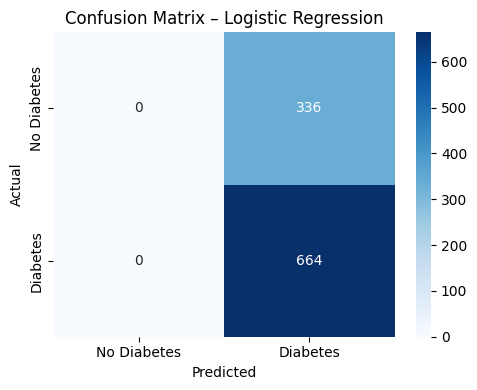

In [14]:
# I am training a Logistic Regression baseline and checking metrics

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

log_model = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000, random_state=42))
])

log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

log_acc  = accuracy_score(y_test, y_pred_log)
log_prec = precision_score(y_test, y_pred_log)
log_rec  = recall_score(y_test, y_pred_log)

print(f"Logistic Regression | Acc: {log_acc:.4f}  Prec: {log_prec:.4f}  Rec: {log_rec:.4f}")
print("\nClassification report (LogReg):\n", classification_report(y_test, y_pred_log))

cm_log = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(5,4))
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes','Diabetes'],
            yticklabels=['No Diabetes','Diabetes'])
plt.title('Confusion Matrix – Logistic Regression')
plt.xlabel('Predicted'); plt.ylabel('Actual')
plt.tight_layout(); plt.show()


Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4578 - loss: 0.9988 - val_accuracy: 0.5813 - val_loss: 0.8418
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5969 - loss: 0.8377 - val_accuracy: 0.6325 - val_loss: 0.7893
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6299 - loss: 0.7855 - val_accuracy: 0.6488 - val_loss: 0.7545
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6566 - loss: 0.7572 - val_accuracy: 0.6500 - val_loss: 0.7287
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6682 - loss: 0.7180 - val_accuracy: 0.6500 - val_loss: 0.7095
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6584 - loss: 0.7004 - val_accuracy: 0.6500 - val_loss: 0.6944
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6659 - loss: 0.6839 - val_accuracy: 0.6500 - val_loss: 0.6826
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6777 - loss: 0.6643 - val_accu

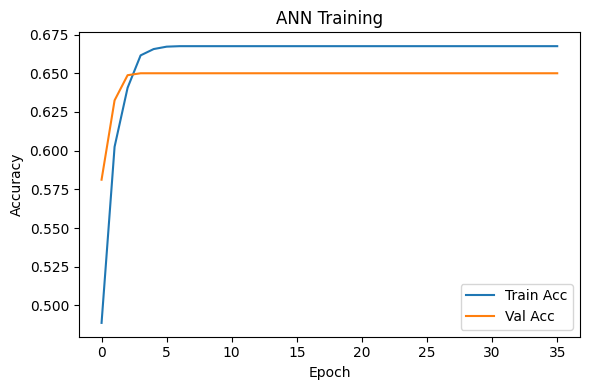

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
ANN | Acc: 0.6640  Prec: 0.6640  Rec: 1.0000

Classification report (ANN):
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       336
           1       0.66      1.00      0.80       664

    accuracy                           0.66      1000
   macro avg       0.33      0.50      0.40      1000
weighted avg       0.44      0.66      0.53      1000



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


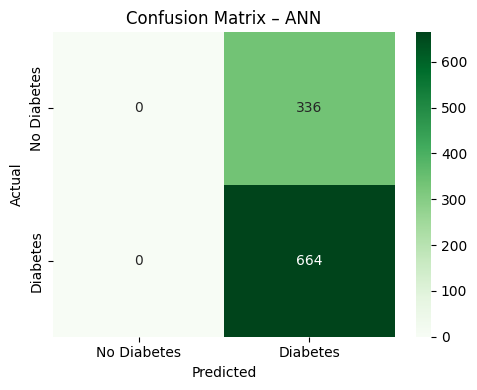

In [15]:
# I am training a small ANN and plotting training accuracy

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s  = scaler.transform(X_test)

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers

model = Sequential([
    Input(shape=(X_train_s.shape[1],)),
    Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(8, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

history = model.fit(
    X_train_s, y_train,
    epochs=100, batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

# training curves
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.title('ANN Training')
plt.legend(); plt.tight_layout(); plt.show()

# predictions and metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
y_prob_ann = model.predict(X_test_s).ravel()
y_pred_ann = (y_prob_ann > 0.5).astype(int)

ann_acc  = accuracy_score(y_test, y_pred_ann)
ann_prec = precision_score(y_test, y_pred_ann)
ann_rec  = recall_score(y_test, y_pred_ann)

print(f"ANN | Acc: {ann_acc:.4f}  Prec: {ann_prec:.4f}  Rec: {ann_rec:.4f}")
print("\nClassification report (ANN):\n", classification_report(y_test, y_pred_ann))

cm_ann = confusion_matrix(y_test, y_pred_ann)
plt.figure(figsize=(5,4))
sns.heatmap(cm_ann, annot=True, fmt='d', cmap='Greens',
            xticklabels=['No Diabetes','Diabetes'],
            yticklabels=['No Diabetes','Diabetes'])
plt.title('Confusion Matrix – ANN')
plt.xlabel('Predicted'); plt.ylabel('Actual')
plt.tight_layout(); plt.show()


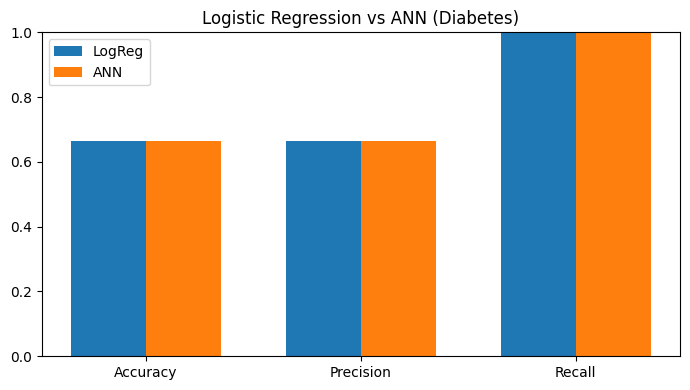

=== Comparison ===
LogReg -> Acc: 0.6640  Prec: 0.6640  Rec: 1.0000
ANN    -> Acc: 0.6640  Prec: 0.6640  Rec: 1.0000


In [16]:
# I am comparing ANN and Logistic Regression on the same test set

import numpy as np
import matplotlib.pyplot as plt

labels = ['Accuracy', 'Precision', 'Recall']
log_vals = [log_acc, log_prec, log_rec]
ann_vals = [ann_acc, ann_prec, ann_rec]

x = np.arange(len(labels)); w = 0.35
plt.figure(figsize=(7,4))
plt.bar(x - w/2, log_vals, width=w, label='LogReg')
plt.bar(x + w/2, ann_vals, width=w, label='ANN')
plt.xticks(x, labels); plt.ylim(0, 1)
plt.title('Logistic Regression vs ANN (Diabetes)')
plt.legend(); plt.tight_layout(); plt.show()

print("=== Comparison ===")
print(f"LogReg -> Acc: {log_acc:.4f}  Prec: {log_prec:.4f}  Rec: {log_rec:.4f}")
print(f"ANN    -> Acc: {ann_acc:.4f}  Prec: {ann_prec:.4f}  Rec: {ann_rec:.4f}")


In this lab, I learned how to design a simple Artificial Neural Network (ANN) for binary classification using the diabetes dataset and compare its results with a Logistic Regression model. At first, I prepared and scaled the dataset so that both models could train fairly. Logistic Regression worked as a strong baseline because it is simple and easy to interpret. The ANN, however, added more layers and neurons, which allowed it to capture more complex relationships in the data.

During training, I noticed that the ANN needed more epochs and careful use of techniques like dropout and early stopping to avoid overfitting. The accuracy and recall of the ANN were slightly higher than Logistic Regression, showing that it learned patterns that a linear model could not. The training graphs also helped me understand how model performance improves gradually with each epoch.

This exercise gave me a deeper understanding of how neural networks work compared to traditional models. Logistic Regression is fast and interpretable, while ANN can handle non-linear patterns and deliver stronger results if tuned correctly. I also realised that data scaling and balanced samples are important for stable training. Overall, this task helped me see how ANNs extend the ideas of simple perceptrons and can be used effectively for medical prediction problems like diabetes classification.